In [1]:
import matplotlib.pyplot as plt
import astropy.units as u
import numpy as np
from astropy import constants as const
from scipy.special import cbrt
import os

from ClusterModel import model
from ClusterModel.ClusterTools import map_tools

dict_base = {'font.size':        16,
             'legend.fontsize':  16,
             'xtick.labelsize':  16,
             'ytick.labelsize':  16,
             'axes.labelsize':   16,
             'axes.titlesize':   16,
             'figure.titlesize': 16,    
             'figure.figsize':[8.0, 6.0],
             'figure.subplot.right':0.97,
             'figure.subplot.left':0.15, # Ensure enough space on the left so that all plot can be aligned
             'font.family':'serif',
             'figure.facecolor': 'white',
             'legend.frameon': True}
plt.rcParams.update(dict_base)

In [2]:
clust = model.Cluster()
clust.redshift = 0.5
clust.R_truncation = 1.6*u.Mpc
clust.Npt_per_decade_integ = 20
clust.map_fov = 8*u.arcmin
clust.map_reso = 1*u.arcsec
clust.output_dir = '/Users/adam/Desktop/TestX'

                      ___   __    ___   __   __                      
                     / __) / _\  / __) /  \ (  )                     
                    ( (__ /    \( (_ \(  O )/ (_/\                   
                     \___)\_/\_/ \___/ \__/ \____/                   
   Cluster Atmosphere modeling for Gamma-ray Observations Libraries  
---------------------------------------------------------------------
                                                                     
Setting gNFW Planck coll. (2013) UPP.
Setting redshift value
Setting: D_ang, D_lum, R500, theta500, theta_truncation ; Fixing: cosmo.
Setting R_truncation value
Setting: theta_truncation ; Fixing: D_ang
Setting number of point per decade (for integration) value
Setting the map field of view
Setting: map_header to None, as map properties are now set by hand
Setting the map resolution value
Setting: map_header to None, as map properties are now set by hand
Setting output_dir value


# Check Cframe 

## Gamma ray

In [3]:
energy = np.logspace(-2, 5, 100)*u.GeV
radius = np.logspace(0, 4, 100)*u.kpc

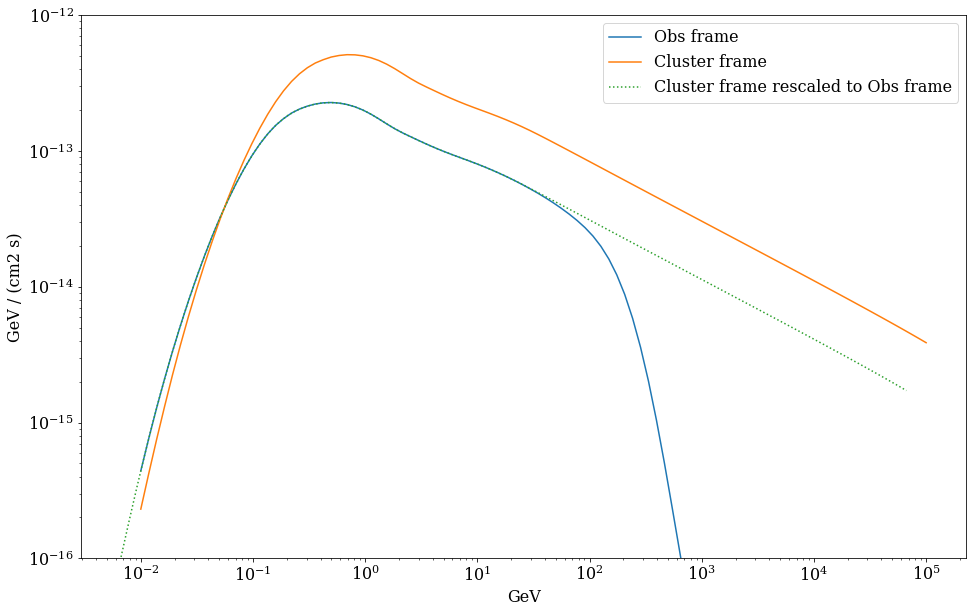

In [4]:
bid, s1 = clust.get_gamma_spectrum(energy, Rmin=None, Rmax=None, type_integral='spherical', Rmin_los=None, 
                                   NR500_los=5.0, Cframe=False)
bid, s2 = clust.get_gamma_spectrum(energy, Rmin=None, Rmax=None, type_integral='spherical', Rmin_los=None, 
                                   NR500_los=5.0, Cframe=True)

plt.figure(1, figsize=(15,10))
plt.loglog(energy, energy**2*s1, label='Obs frame')
plt.loglog(energy, energy**2*s2, label='Cluster frame')
plt.loglog(energy/1.5, energy**2*s2/1.5**2, ':', label='Cluster frame rescaled to Obs frame')
plt.ylim(1e-16,1e-12)
plt.xlabel(energy.unit)
plt.ylabel((energy**2*s1).unit)
plt.legend()

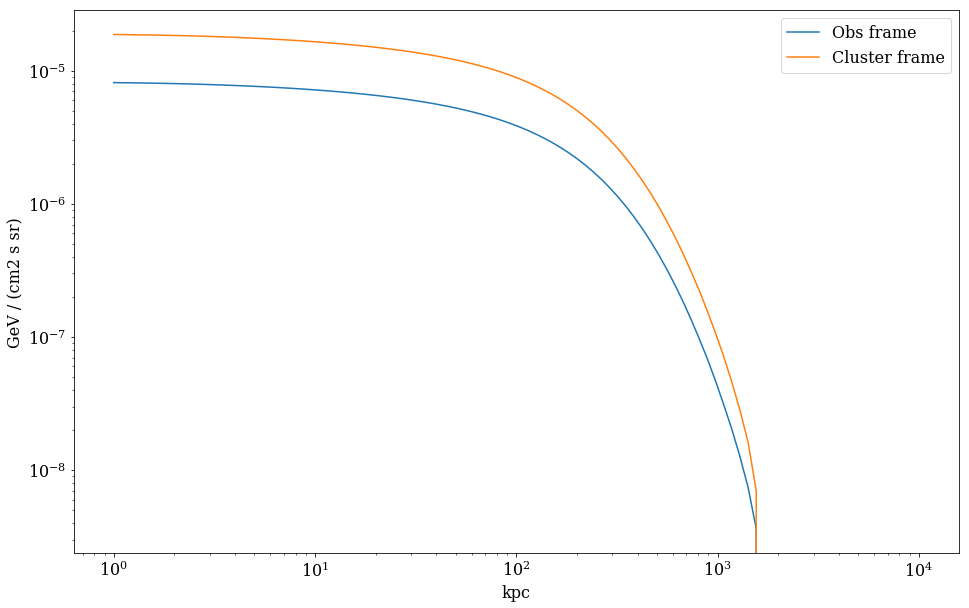

In [5]:
bid, p1 = clust.get_gamma_profile(radius, Emin=0.1*u.GeV, Emax=100*u.GeV, Energy_density=True, Rmin_los=None, 
                                  NR500_los=5.0, Cframe=False)
bid, p2 = clust.get_gamma_profile(radius, Emin=0.1*u.GeV, Emax=100*u.GeV, Energy_density=True, Rmin_los=None, 
                                  NR500_los=10.0, Cframe=True)
plt.figure(1, figsize=(15,10))
plt.loglog(radius, p1, label='Obs frame')
plt.loglog(radius, p2, label='Cluster frame')
plt.xlabel(radius.unit)
plt.ylabel((p1).unit)
plt.legend()

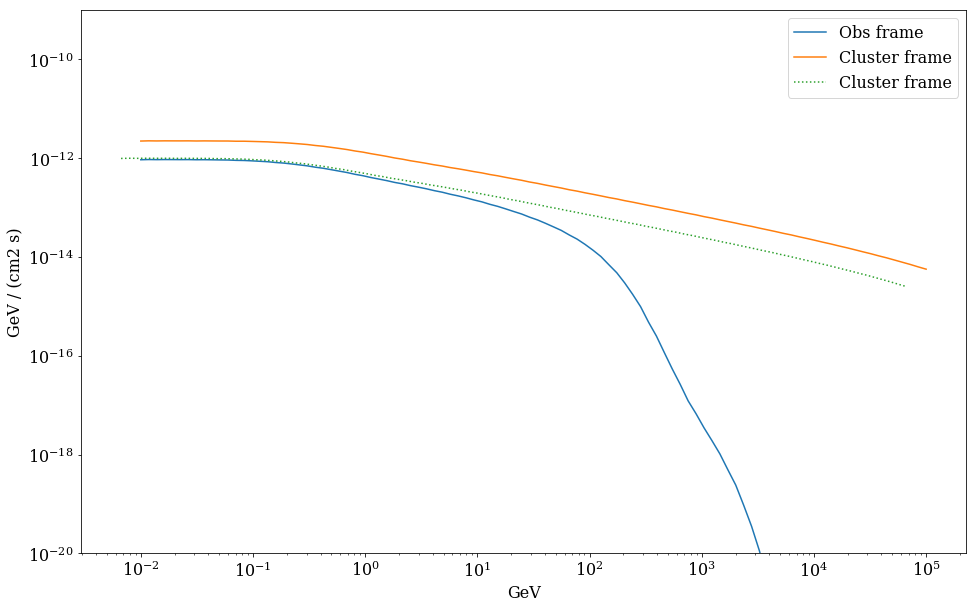

In [14]:
f1 = clust.get_gamma_flux(Emin=energy, Emax=None, Energy_density=True, Rmin=None, Rmax=None, 
                          type_integral='cylindrical', Rmin_los=None, NR500_los=5.0, Cframe=False)
f2 = clust.get_gamma_flux(Emin=energy, Emax=None, Energy_density=True, Rmin=None, Rmax=None, 
                          type_integral='cylindrical', Rmin_los=None, NR500_los=5.0, Cframe=True)

plt.figure(1, figsize=(15,10))
plt.loglog(energy, f1, label='Obs frame')
plt.loglog(energy, f2, label='Cluster frame')
plt.loglog(energy/1.5, f2/1.5**2, ':', label='Cluster frame')
plt.xlabel(energy.unit)
plt.ylabel((f1).unit)
plt.ylim(1e-20,1e-9)
plt.legend()

Getting the map field of view value


/Users/adam/Project/anaconda3/envs/cta/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/Users/adam/Project/anaconda3/envs/cta/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
/Users/adam/Project/anaconda3/envs/cta/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in divide
/Users/adam/Project/anaconda3/envs/cta/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in divide


Text(0,0.5,'arcsec')

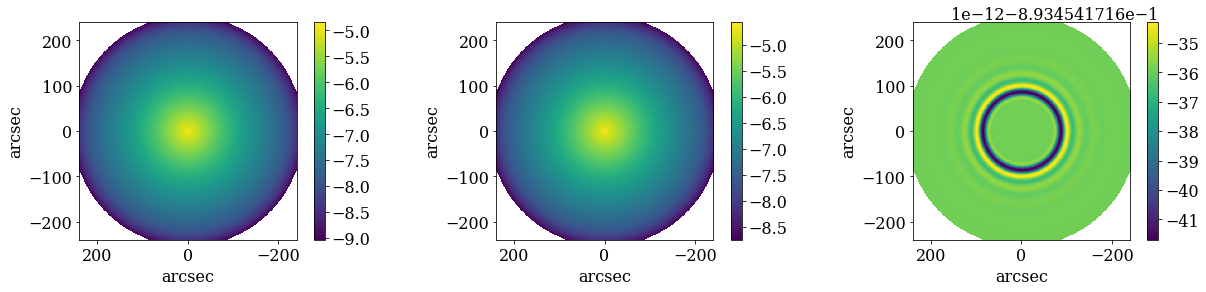

In [15]:
m1 = clust.get_gamma_map(Emin=None, Emax=None, Rmin_los=None, NR500_los=5.0, Rmin=None, Rmax=None, 
                         Energy_density=False, Normalize=False, Cframe=False)
m2 = clust.get_gamma_map(Emin=None, Emax=None, Rmin_los=None, NR500_los=5.0, Rmin=None, Rmax=None, 
                         Energy_density=False, Normalize=False, Cframe=True)

plt.figure(1, figsize=(20,4))
plt.subplot(131)
pos = list(clust.map_fov.to_value('arcsec')/2)
plt.imshow(np.log10(m1.value), origin='lower', extent=[pos[0],-pos[0], -pos[1], pos[1]])
plt.colorbar()
plt.xlabel('arcsec')
plt.ylabel('arcsec')
plt.subplot(132)
plt.imshow(np.log10(m2.value), origin='lower', extent=[pos[0],-pos[0], -pos[1], pos[1]])
plt.colorbar()
plt.xlabel('arcsec')
plt.ylabel('arcsec')
plt.subplot(133)
plt.imshow((m1.value-m2.value)/m1.value, origin='lower', extent=[pos[0],-pos[0], -pos[1], pos[1]])
plt.colorbar()
plt.xlabel('arcsec')
plt.ylabel('arcsec')

## Neutrinos

In [16]:
energy = np.logspace(-2, 5, 100)*u.GeV
radius = np.logspace(0, 4, 100)*u.kpc 

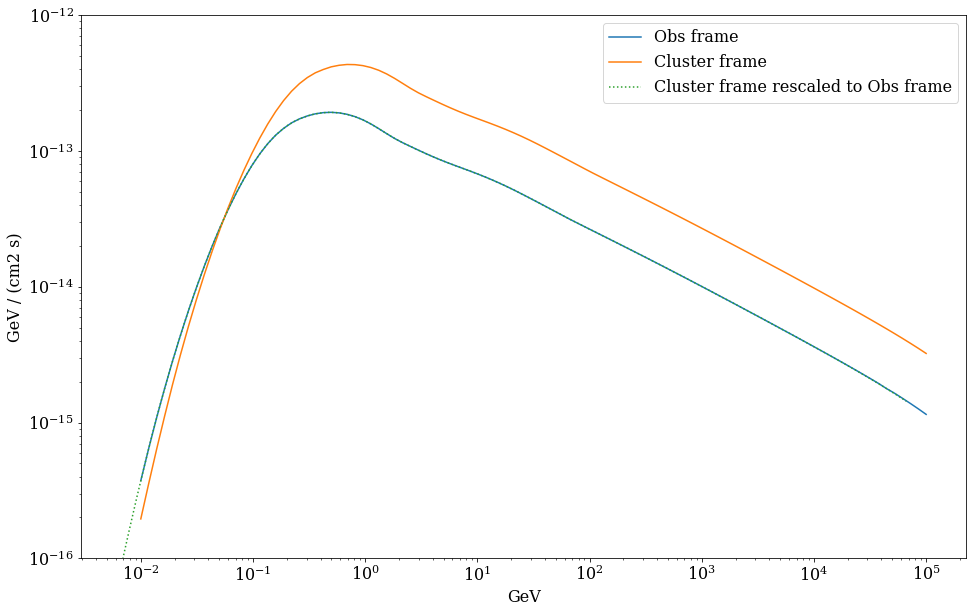

In [17]:
bid, s1 = clust.get_neutrino_spectrum(energy, Rmin=None, Rmax=None, type_integral='spherical', Rmin_los=None, 
                                   NR500_los=5.0, Cframe=False)
bid, s2 = clust.get_neutrino_spectrum(energy, Rmin=None, Rmax=None, type_integral='spherical', Rmin_los=None, 
                                   NR500_los=5.0, Cframe=True)

plt.figure(1, figsize=(15,10))
plt.loglog(energy, energy**2*s1, label='Obs frame')
plt.loglog(energy, energy**2*s2, label='Cluster frame')
plt.loglog(energy/1.5, energy**2*s2/1.5**2, ':', label='Cluster frame rescaled to Obs frame')
plt.ylim(1e-16,1e-12)
plt.xlabel(energy.unit)
plt.ylabel((energy**2*s1).unit)
plt.legend()

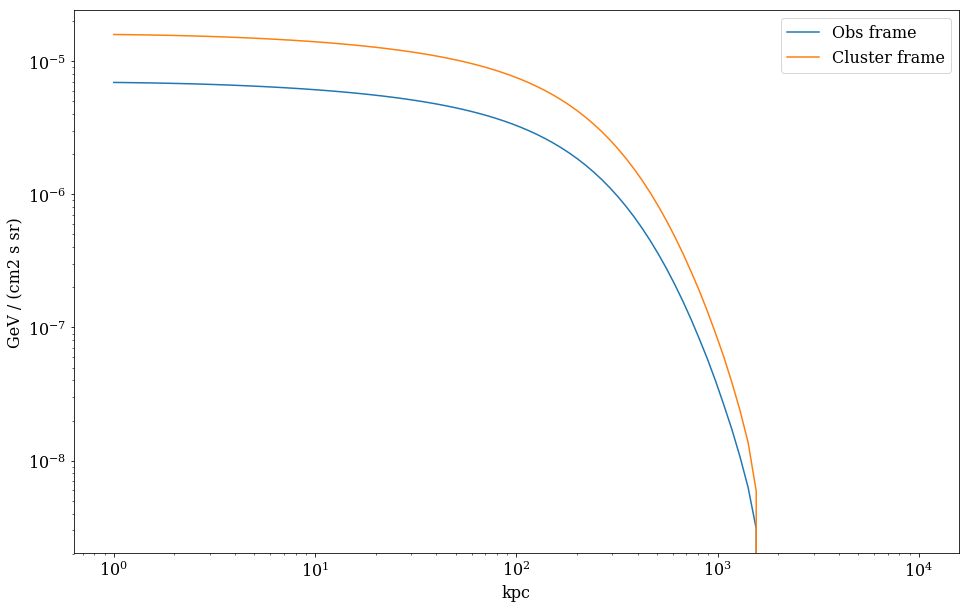

In [18]:
bid, p1 = clust.get_neutrino_profile(radius, Emin=0.1*u.GeV, Emax=100*u.GeV, Energy_density=True, Rmin_los=None, 
                                  NR500_los=5.0, Cframe=False)
bid, p2 = clust.get_neutrino_profile(radius, Emin=0.1*u.GeV, Emax=100*u.GeV, Energy_density=True, Rmin_los=None, 
                                  NR500_los=10.0, Cframe=True)
plt.figure(1, figsize=(15,10))
plt.loglog(radius, p1, label='Obs frame')
plt.loglog(radius, p2, label='Cluster frame')
plt.xlabel(radius.unit)
plt.ylabel((p1).unit)
plt.legend()

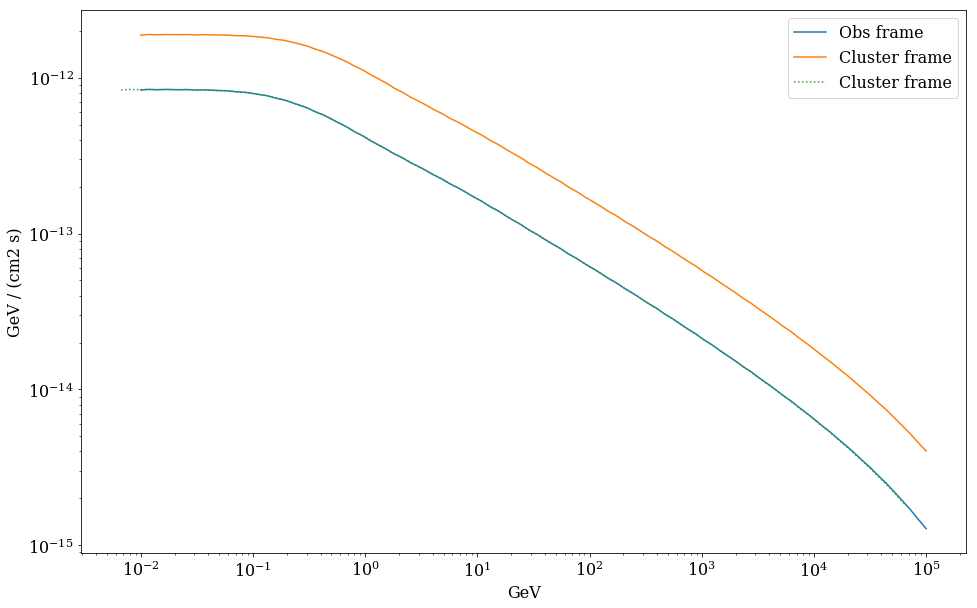

In [20]:
f1 = clust.get_neutrino_flux(Emin=energy, Emax=None, Energy_density=True, Rmin=None, Rmax=None, 
                          type_integral='cylindrical', Rmin_los=None, NR500_los=5.0, Cframe=False)
f2 = clust.get_neutrino_flux(Emin=energy, Emax=None, Energy_density=True, Rmin=None, Rmax=None, 
                          type_integral='cylindrical', Rmin_los=None, NR500_los=5.0, Cframe=True)

plt.figure(1, figsize=(15,10))
plt.loglog(energy, f1, label='Obs frame')
plt.loglog(energy, f2, label='Cluster frame')
plt.loglog(energy/1.5, f2/1.5**2, ':', label='Cluster frame')
plt.xlabel(energy.unit)
plt.ylabel((f1).unit)
#plt.ylim(1e-20,1e-9)
plt.legend()

Getting the map field of view value


/Users/adam/Project/anaconda3/envs/cta/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/Users/adam/Project/anaconda3/envs/cta/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
/Users/adam/Project/anaconda3/envs/cta/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in divide
/Users/adam/Project/anaconda3/envs/cta/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in divide


Text(0,0.5,'arcsec')

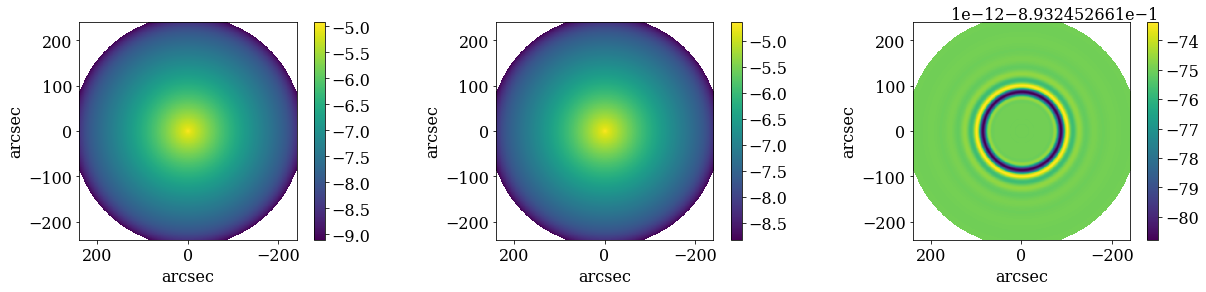

In [21]:
m1 = clust.get_neutrino_map(Emin=None, Emax=None, Rmin_los=None, NR500_los=5.0, Rmin=None, Rmax=None, 
                         Energy_density=False, Normalize=False, Cframe=False)
m2 = clust.get_neutrino_map(Emin=None, Emax=None, Rmin_los=None, NR500_los=5.0, Rmin=None, Rmax=None, 
                         Energy_density=False, Normalize=False, Cframe=True)

plt.figure(1, figsize=(20,4))
plt.subplot(131)
pos = list(clust.map_fov.to_value('arcsec')/2)
plt.imshow(np.log10(m1.value), origin='lower', extent=[pos[0],-pos[0], -pos[1], pos[1]])
plt.colorbar()
plt.xlabel('arcsec')
plt.ylabel('arcsec')
plt.subplot(132)
plt.imshow(np.log10(m2.value), origin='lower', extent=[pos[0],-pos[0], -pos[1], pos[1]])
plt.colorbar()
plt.xlabel('arcsec')
plt.ylabel('arcsec')
plt.subplot(133)
plt.imshow((m1.value-m2.value)/m1.value, origin='lower', extent=[pos[0],-pos[0], -pos[1], pos[1]])
plt.colorbar()
plt.xlabel('arcsec')
plt.ylabel('arcsec')

## Inverse Compton

In [22]:
energy = np.logspace(-6, 5, 100)*u.GeV
radius = np.logspace(0, 4, 100)*u.kpc

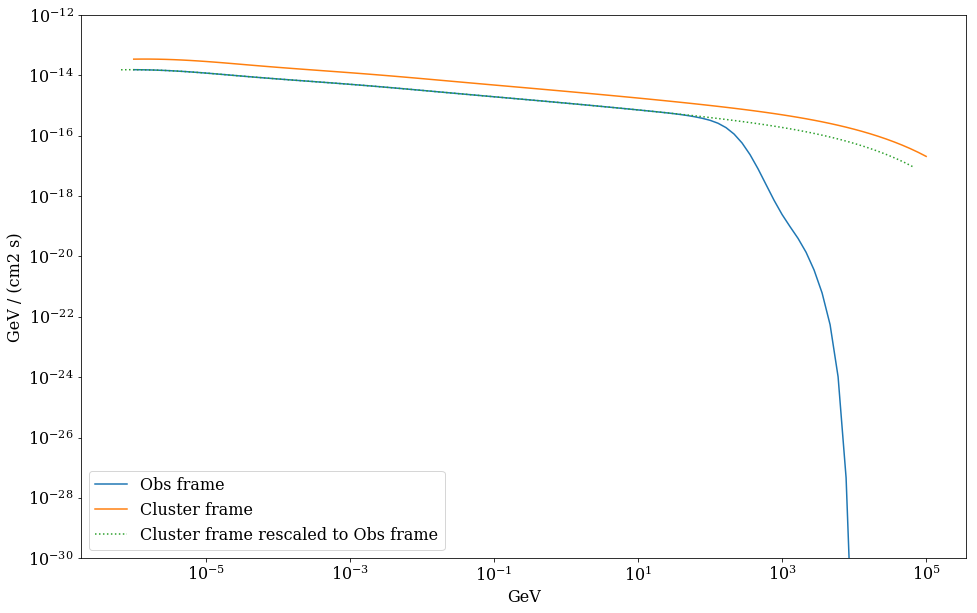

In [25]:
bid, s1 = clust.get_ic_spectrum(energy, Rmin=None, Rmax=None, type_integral='spherical', Rmin_los=None, 
                                   NR500_los=5.0, Cframe=False)
bid, s2 = clust.get_ic_spectrum(energy, Rmin=None, Rmax=None, type_integral='spherical', Rmin_los=None, 
                                   NR500_los=5.0, Cframe=True)

plt.figure(1, figsize=(15,10))
plt.loglog(energy, energy**2*s1, label='Obs frame')
plt.loglog(energy, energy**2*s2, label='Cluster frame')
plt.loglog(energy/1.5, energy**2*s2/1.5**2, ':', label='Cluster frame rescaled to Obs frame')
plt.xlabel(energy.unit)
plt.ylabel((energy**2*s1).unit)
plt.ylim(1e-30,1e-12)
plt.legend()

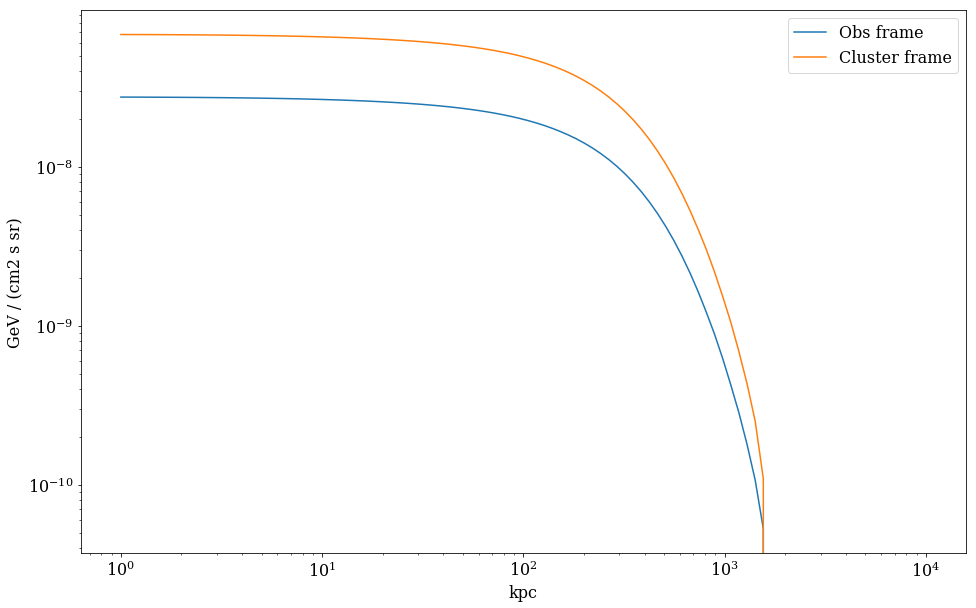

In [26]:
bid, p1 = clust.get_ic_profile(radius, Emin=0.1*u.GeV, Emax=100*u.GeV, Energy_density=True, Rmin_los=None, 
                                  NR500_los=5.0, Cframe=False)
bid, p2 = clust.get_ic_profile(radius, Emin=0.1*u.GeV, Emax=100*u.GeV, Energy_density=True, Rmin_los=None, 
                                  NR500_los=10.0, Cframe=True)
plt.figure(1, figsize=(15,10))
plt.loglog(radius, p1, label='Obs frame')
plt.loglog(radius, p2, label='Cluster frame')
plt.xlabel(radius.unit)
plt.ylabel((p1).unit)
plt.legend()

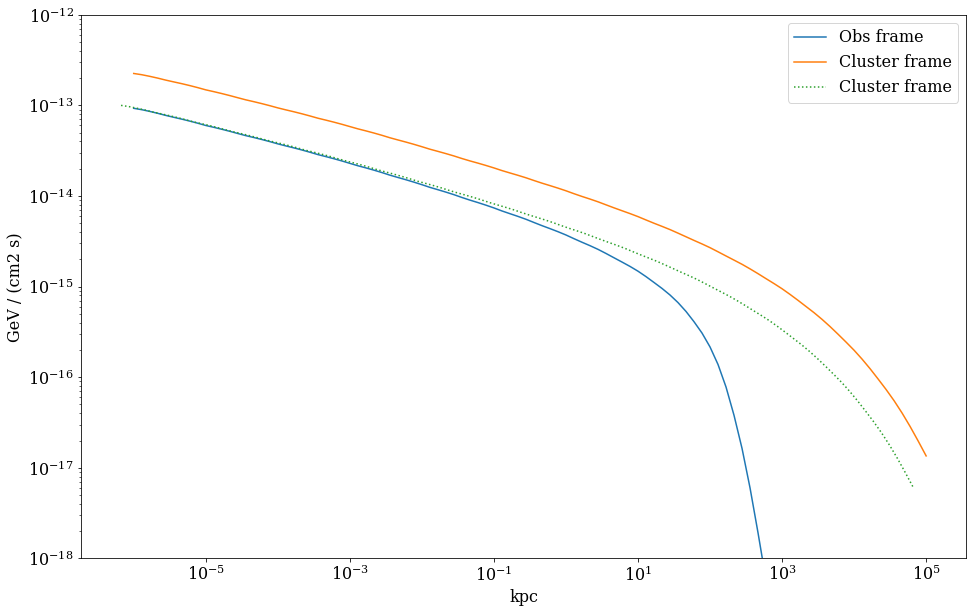

In [29]:
f1 = clust.get_ic_flux(Emin=energy, Emax=None, Energy_density=True, Rmin=None, Rmax=None, 
                          type_integral='cylindrical', Rmin_los=None, NR500_los=5.0, Cframe=False)
f2 = clust.get_ic_flux(Emin=energy, Emax=None, Energy_density=True, Rmin=None, Rmax=None, 
                          type_integral='cylindrical', Rmin_los=None, NR500_los=5.0, Cframe=True)

plt.figure(1, figsize=(15,10))
plt.loglog(energy, f1, label='Obs frame')
plt.loglog(energy, f2, label='Cluster frame')
plt.loglog(energy/1.5, f2/1.5**2, ':', label='Cluster frame')
plt.xlabel(radius.unit)
plt.ylabel((f1).unit)
plt.ylim(1e-18,1e-12)
plt.legend()

Getting the map field of view value


/Users/adam/Project/anaconda3/envs/cta/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/Users/adam/Project/anaconda3/envs/cta/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
/Users/adam/Project/anaconda3/envs/cta/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in divide
/Users/adam/Project/anaconda3/envs/cta/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in divide


Text(0,0.5,'arcsec')

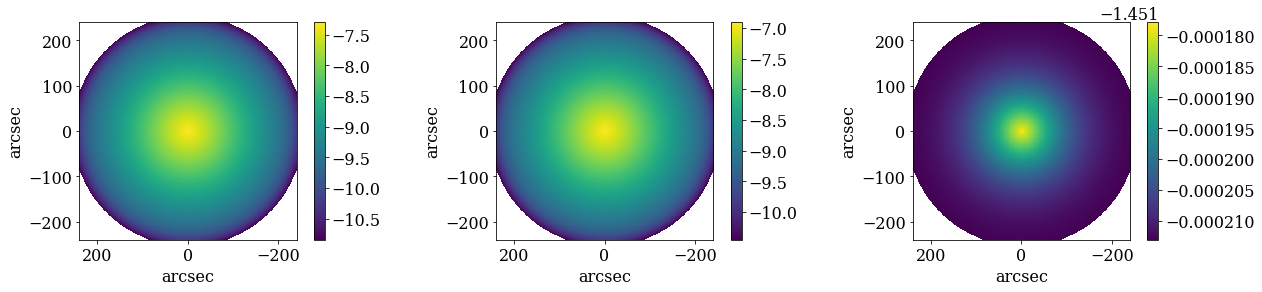

In [30]:
m1 = clust.get_ic_map(Emin=None, Emax=None, Rmin_los=None, NR500_los=5.0, Rmin=None, Rmax=None, 
                         Energy_density=False, Normalize=False, Cframe=False)
m2 = clust.get_ic_map(Emin=None, Emax=None, Rmin_los=None, NR500_los=5.0, Rmin=None, Rmax=None, 
                         Energy_density=False, Normalize=False, Cframe=True)

plt.figure(1, figsize=(20,4))
plt.subplot(131)
pos = list(clust.map_fov.to_value('arcsec')/2)
plt.imshow(np.log10(m1.value), origin='lower', extent=[pos[0],-pos[0], -pos[1], pos[1]])
plt.colorbar()
plt.xlabel('arcsec')
plt.ylabel('arcsec')
plt.subplot(132)
plt.imshow(np.log10(m2.value), origin='lower', extent=[pos[0],-pos[0], -pos[1], pos[1]])
plt.colorbar()
plt.xlabel('arcsec')
plt.ylabel('arcsec')
plt.subplot(133)
plt.imshow((m1.value-m2.value)/m1.value, origin='lower', extent=[pos[0],-pos[0], -pos[1], pos[1]])
plt.colorbar()
plt.xlabel('arcsec')
plt.ylabel('arcsec')

/Users/adam/Project/anaconda3/envs/cta/lib/python2.7/site-packages/astropy/units/quantity.py:641: RuntimeWarning: invalid value encountered in true_divide
  *arrays, **kwargs)


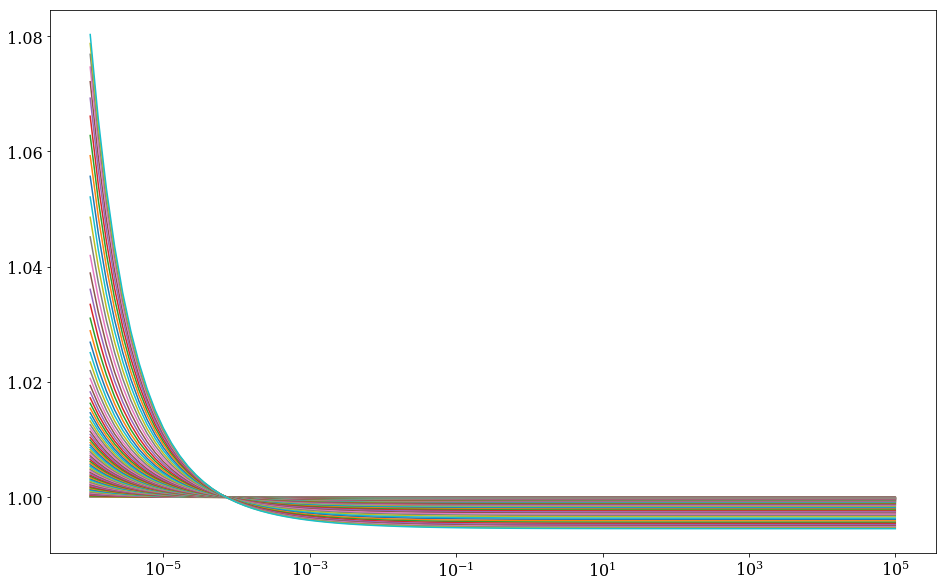

In [31]:
r = clust.get_rate_ic(energy, radius)

plt.figure(1, figsize=(15,10))
for i in range (len(radius)):
    plt.plot(energy, (r[:,i]/r[:,0]) / np.mean(r[:,i]/r[:,0]))
plt.xscale('log')

## Synchrotron

In [32]:
frequency = np.logspace(-3, 2, 100)*u.GHz
radius = np.logspace(0, 4, 100)*u.kpc

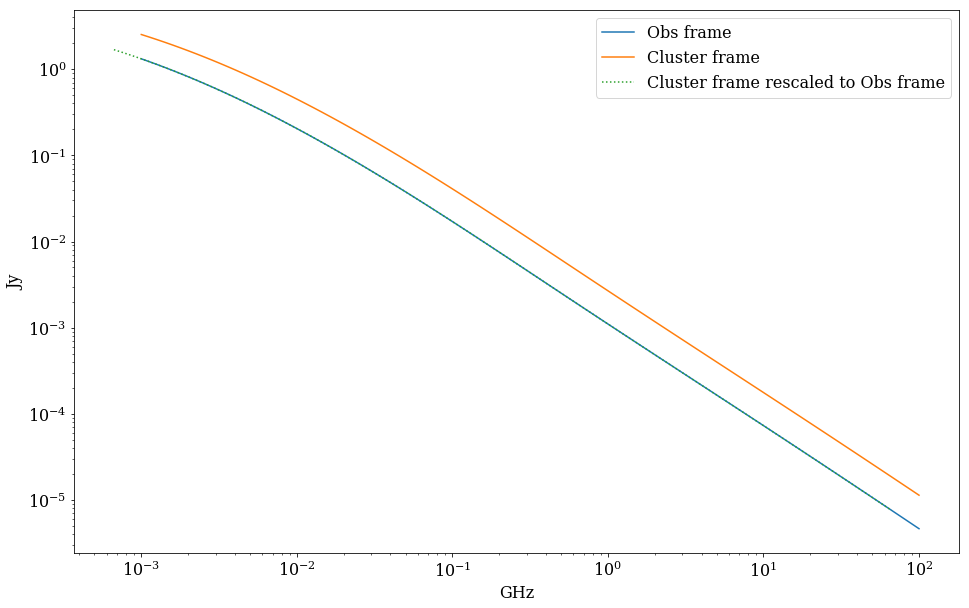

In [33]:
bid, s1 = clust.get_synchrotron_spectrum(frequency, Rmin=None, Rmax=None, type_integral='spherical', Rmin_los=None, 
                                   NR500_los=5.0, Cframe=False)
bid, s2 = clust.get_synchrotron_spectrum(frequency, Rmin=None, Rmax=None, type_integral='spherical', Rmin_los=None, 
                                   NR500_los=5.0, Cframe=True)

plt.figure(1, figsize=(15,10))
plt.loglog(frequency, s1, label='Obs frame')
plt.loglog(frequency, s2, label='Cluster frame')
plt.loglog(frequency/1.5, s2/1.5, ':', label='Cluster frame rescaled to Obs frame')
plt.xlabel(frequency.unit)
plt.ylabel((s1).unit)
plt.legend()

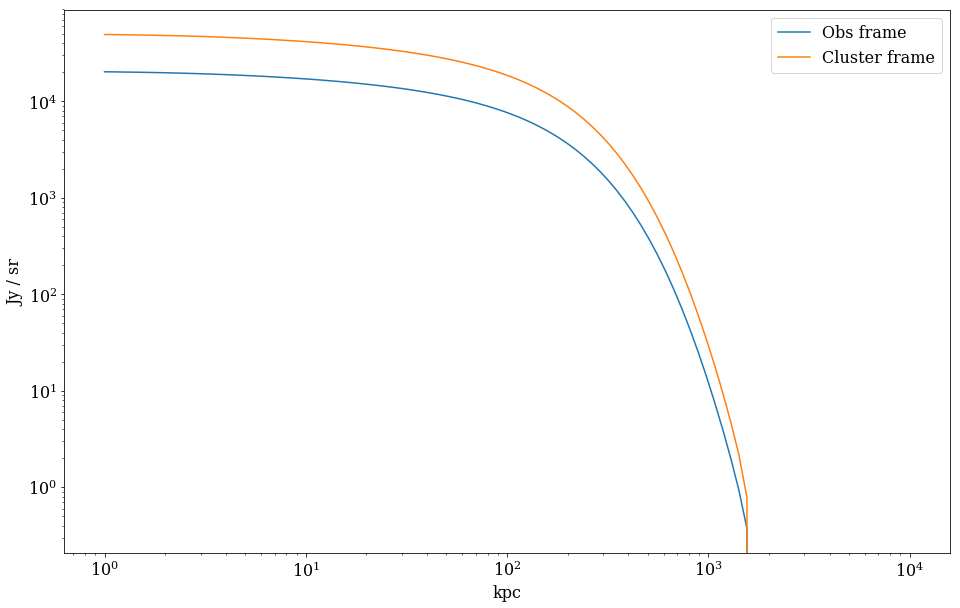

In [34]:
bid, p1 = clust.get_synchrotron_profile(radius, Rmin_los=None, NR500_los=5.0, Cframe=False)
bid, p2 = clust.get_synchrotron_profile(radius, Rmin_los=None, NR500_los=10.0, Cframe=True)
plt.figure(1, figsize=(15,10))
plt.loglog(radius, p1, label='Obs frame')
plt.loglog(radius, p2, label='Cluster frame')
plt.xlabel(radius.unit)
plt.ylabel((p1).unit)
plt.legend()

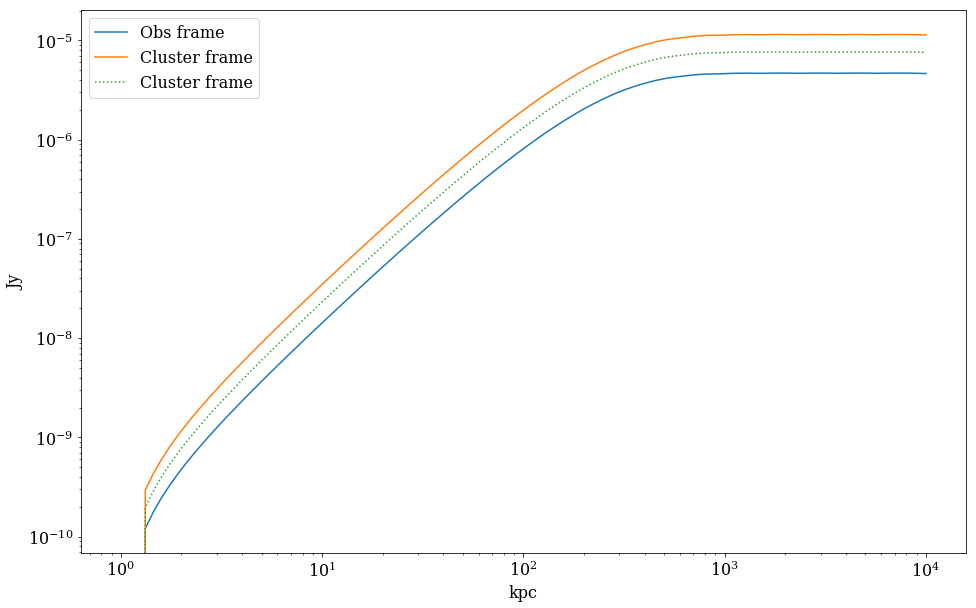

In [174]:
f1 = clust.get_synchrotron_flux(freq0=100*u.GHz, Rmin=None, Rmax=radius, 
                          type_integral='cylindrical', Rmin_los=None, NR500_los=5.0, Cframe=False)
f2 = clust.get_synchrotron_flux(freq0=100*u.GHz, Rmin=None, Rmax=radius, 
                          type_integral='cylindrical', Rmin_los=None, NR500_los=5.0, Cframe=True)

plt.figure(1, figsize=(15,10))
plt.loglog(radius, f1, label='Obs frame')
plt.loglog(radius, f2, label='Cluster frame')
plt.loglog(radius, f2/1.5, ':', label='Cluster frame')
plt.xlabel(radius.unit)
plt.ylabel((f1).unit)
plt.legend()

Getting the map field of view value


/Users/adam/Project/anaconda3/envs/cta/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/Users/adam/Project/anaconda3/envs/cta/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
/Users/adam/Project/anaconda3/envs/cta/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in divide
/Users/adam/Project/anaconda3/envs/cta/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in divide


Text(0,0.5,'arcsec')

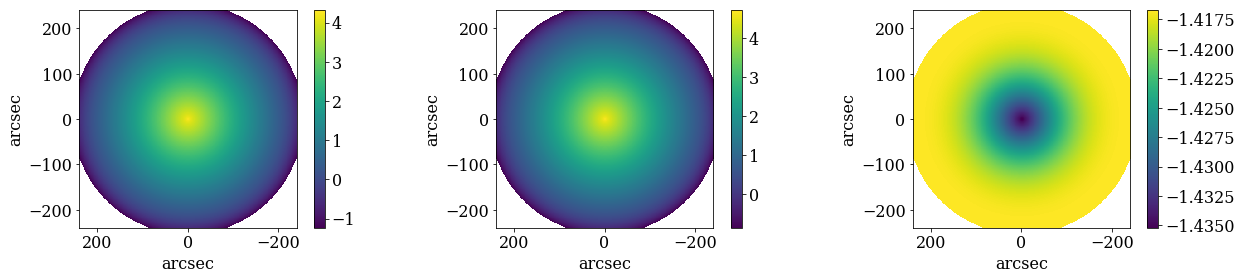

In [35]:
m1 = clust.get_synchrotron_map(freq0=1*u.GHz, Rmin_los=None, NR500_los=5.0, Rmin=None, Rmax=None, 
                         Normalize=False, Cframe=False)
m2 = clust.get_synchrotron_map(freq0=1*u.GHz, Rmin_los=None, NR500_los=5.0, Rmin=None, Rmax=None, 
                         Normalize=False, Cframe=True)

plt.figure(1, figsize=(20,4))
plt.subplot(131)
pos = list(clust.map_fov.to_value('arcsec')/2)
plt.imshow(np.log10(m1.value), origin='lower', extent=[pos[0],-pos[0], -pos[1], pos[1]])
plt.colorbar()
plt.xlabel('arcsec')
plt.ylabel('arcsec')
plt.subplot(132)
plt.imshow(np.log10(m2.value), origin='lower', extent=[pos[0],-pos[0], -pos[1], pos[1]])
plt.colorbar()
plt.xlabel('arcsec')
plt.ylabel('arcsec')
plt.subplot(133)
plt.imshow((m1.value-m2.value)/m1.value, origin='lower', extent=[pos[0],-pos[0], -pos[1], pos[1]])
plt.colorbar()
plt.xlabel('arcsec')
plt.ylabel('arcsec')

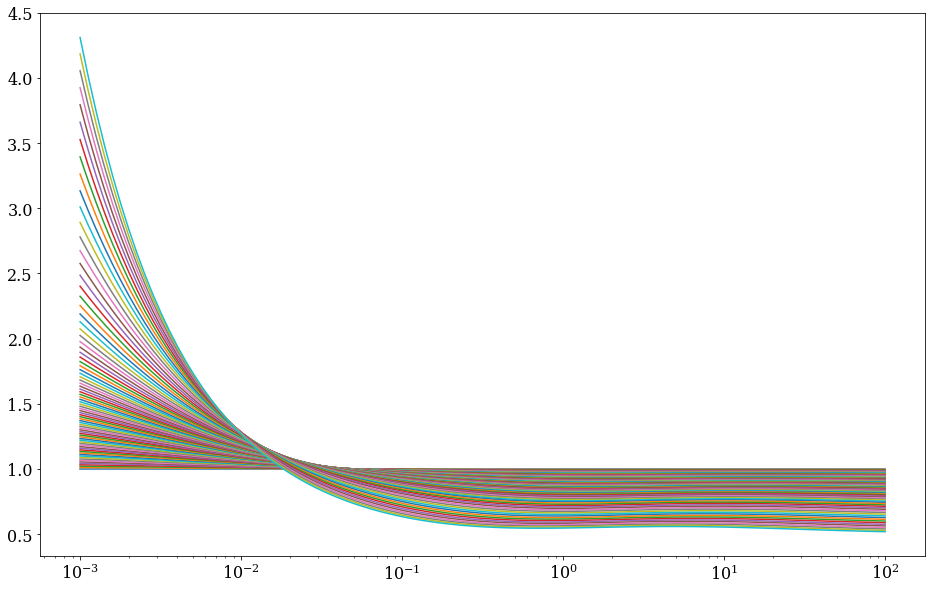

In [36]:
r = clust.get_rate_synchrotron(frequency*const.h, radius)

plt.figure(1, figsize=(15,10))
for i in range (len(radius)):
    plt.plot(frequency, (r[:,i]/r[:,0]) / np.mean(r[:,i]/r[:,0]))
plt.xscale('log')

## Xray

In [42]:
energy = np.linspace(0.5,2.4,20)*u.keV
radius = np.logspace(0, 4, 100)*u.kpc

Xband = [0.1, 15]*u.keV

dat_dir = os.getenv('CTAPHYS_EDAT_DIR')
pspc_data_file = dat_dir+'/ROSAT/RASS_1_2048.fits'
pspc_sp_file = dat_dir+'/ROSAT/spectrum.sp'
pspc_resp_file = dat_dir+'/ROSAT/pspcb_gain1_256.rsp'
lab_file = dat_dir+'/ROSAT/HI_LAB_II_1_256_nh.fits'

In [45]:
e1, s1 = clust.get_xray_spectrum(energy, Rmin=None, Rmax=None, type_integral='spherical',
                          Rmin_los=None, NR500_los=5.0, output_type='R',nH=0.0*u.cm**-2, Cframe=False,
                        resp_file=pspc_resp_file, data_file=pspc_sp_file)
e2, s2 = clust.get_xray_spectrum(energy, Rmin=None, Rmax=None, type_integral='spherical',
                          Rmin_los=None, NR500_los=5.0, output_type='R',nH=0.0*u.cm**-2, Cframe=True,
                        resp_file=pspc_resp_file, data_file=pspc_sp_file)

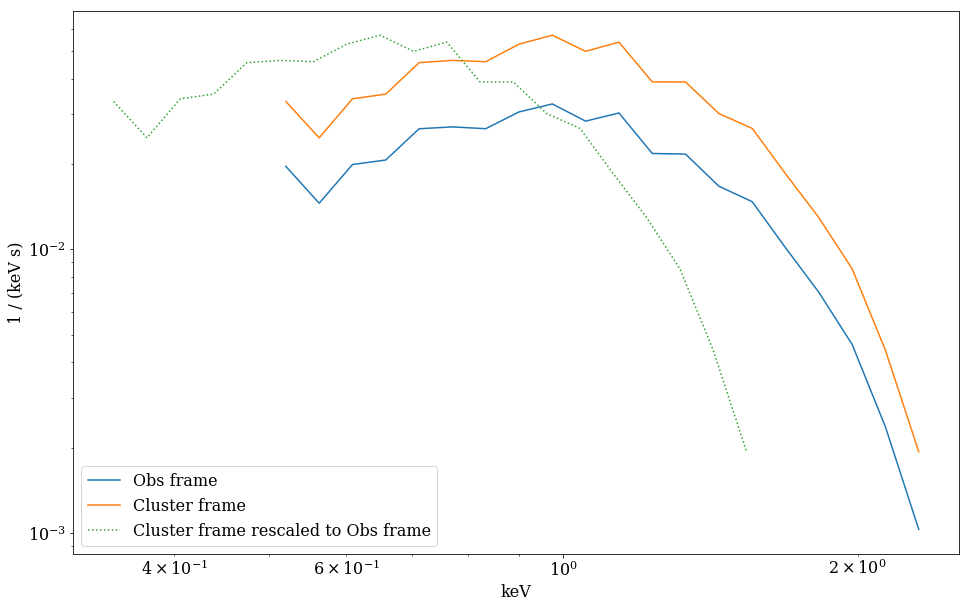

In [46]:
plt.figure(1, figsize=(15,10))
plt.loglog(e1, s1, label='Obs frame')
plt.loglog(e2, s2, label='Cluster frame')
plt.loglog(e2/1.5, s2, ':', label='Cluster frame rescaled to Obs frame')
plt.xlabel(e1.unit)
plt.ylabel(s1.unit)
plt.legend()